In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
s1 = pd.read_csv('../data/s1_ow_cleaned.csv')
s2 = pd.read_csv('../data/s2_ow_cleaned.csv')
s3 = pd.read_csv('../data/s3_ow_cleaned.csv')
s4 = pd.read_csv('../data/s4_ow_cleaned.csv')

In [3]:
s4.tail()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,"Scoped Accuracy, %",Role
291,Echo,Gold,2.77,1.06,46.16,18.56,6.56,62,8037,NaN,8.00,NaN,Damage
292,Echo,Platinum,2.81,1.42,47.65,18.87,6.30,60,8361,NaN,8.05,NaN,Damage
293,Echo,Diamond,2.84,2.03,47.82,19.40,6.08,57,8671,NaN,7.98,NaN,Damage
294,Echo,Master,2.83,2.83,50.05,19.39,5.66,52,8900,NaN,7.90,NaN,Damage
295,Echo,Grandmaster,3.00,4.67,52.21,19.43,5.23,48,9236,NaN,7.51,NaN,Damage


In [4]:
s1.head()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,"Scoped Accuracy, %",Role
0,Ana,All,3.77,8.37,52.19,8.86,4.06,67,2400,7746.0,6.66,55.0,Support
1,Ana,Bronze,3.43,5.90,48.67,7.89,3.89,64,2234,7357.0,6.88,51.0,Support
2,Ana,Silver,3.30,5.94,43.95,7.88,3.74,65,2258,7208.0,7.08,52.0,Support
3,Ana,Gold,3.45,6.10,49.55,8.39,4.07,64,2307,7548.0,6.87,53.0,Support
4,Ana,Platinum,3.76,10.20,52.73,8.57,3.99,63,2321,7920.0,6.61,55.0,Support


In [5]:
# Sorting data into roles
s4_dps = s4[s4['Role'] == 'Damage']
s4_tank = s4[s4['Role'] == 'Tank']
s4_heals = s4[s4['Role'] == 'Support']

In [6]:
s4_dps.head()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,"Scoped Accuracy, %",Role
16,Genji,All,2.50,3.45,49.28,18.30,5.06,64,7292,NaN,8.09,NaN,Damage
17,Genji,Bronze,2.37,1.15,44.89,16.33,5.34,70,6572,NaN,8.15,NaN,Damage
18,Genji,Silver,2.53,1.40,47.39,16.91,5.26,69,6777,NaN,8.16,NaN,Damage
19,Genji,Gold,2.50,2.21,48.29,17.63,5.31,68,7044,NaN,8.17,NaN,Damage
20,Genji,Platinum,2.51,3.53,49.10,18.32,5.21,66,7291,NaN,8.14,NaN,Damage


c:\Users\rakee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


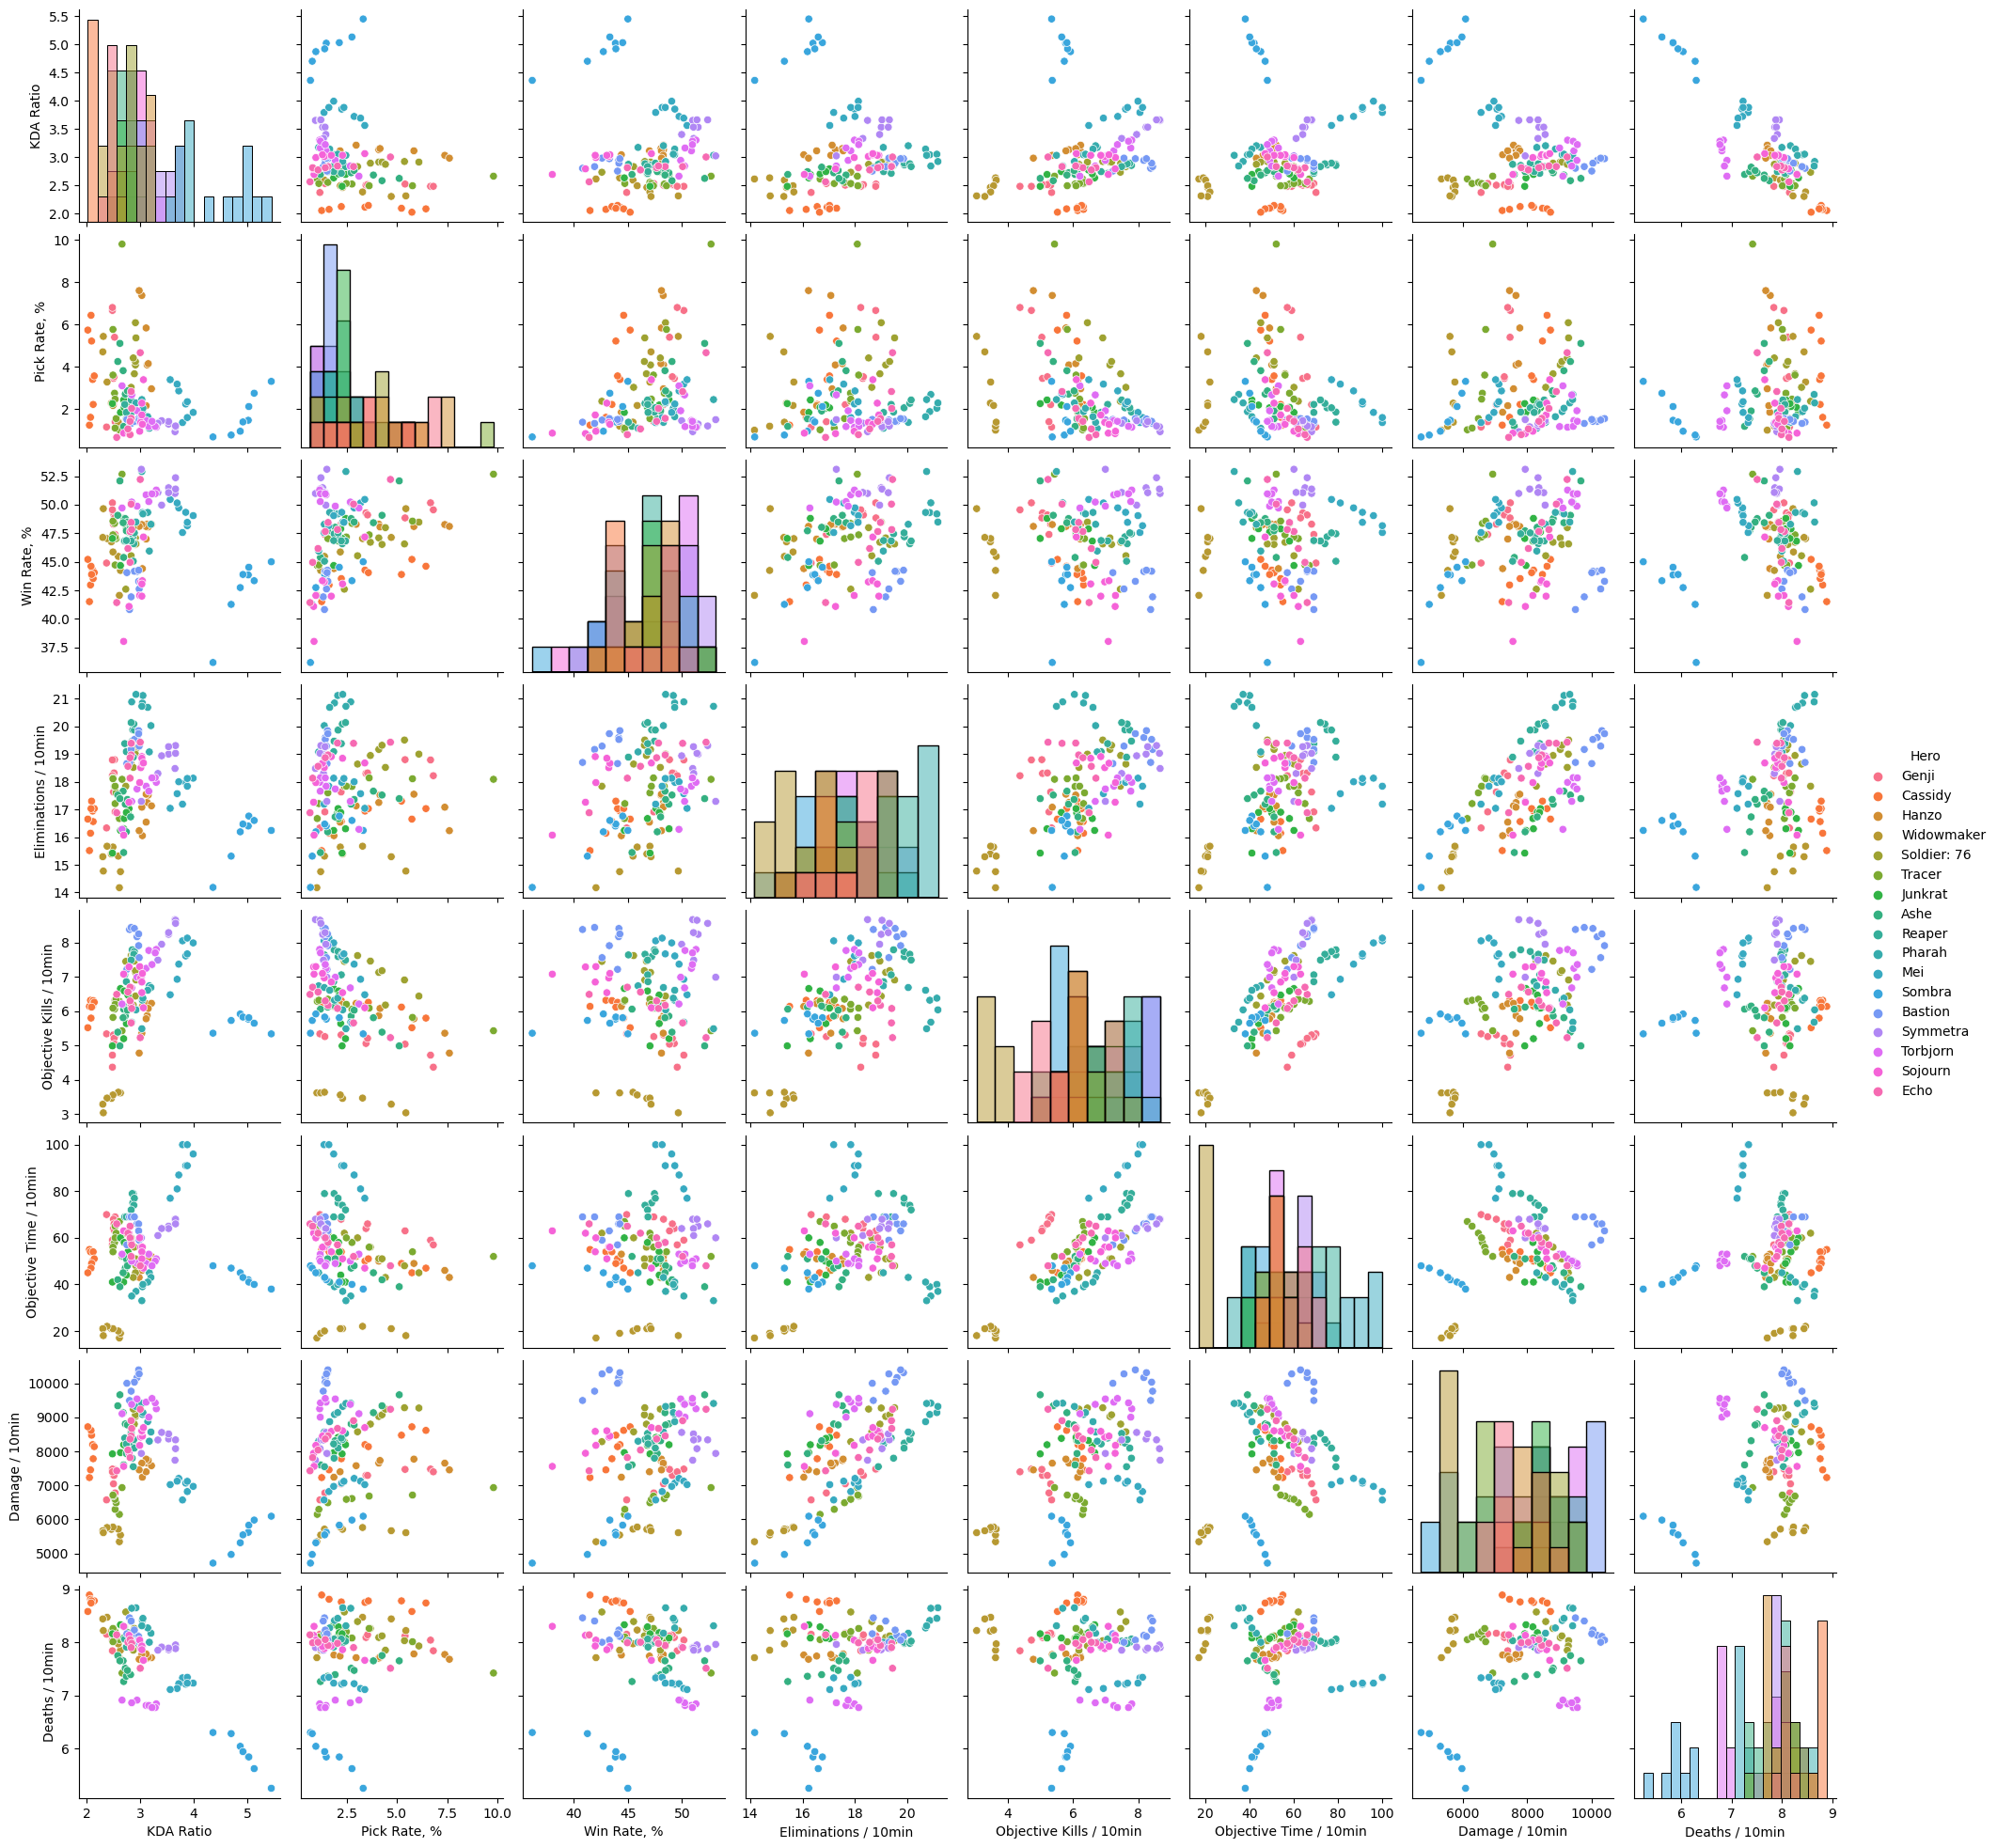

In [7]:

selected_columns = ['KDA Ratio', 'Pick Rate, %', 'Win Rate, %', 'Eliminations / 10min',
                    'Objective Kills / 10min', 'Objective Time / 10min', 'Damage / 10min', 'Deaths / 10min']


sns.pairplot(s4_dps[selected_columns + ['Hero']], hue='Hero', diag_kind='hist')
plt.savefig('../images/dps_pairplot_.png')

I decided to sort by Hero to get a better visualization of the data. 
Key take aways:
- KDA tends to correlate significantly with every chossen metric except pick rate
- Howoever, when you isolate by hero, pick rate
- There is a significant negative correlation between KDA and deaths per 10 mins
- This data shows that certain Hero significanlty outperform the rest of the field (sombra)


c:\Users\rakee\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


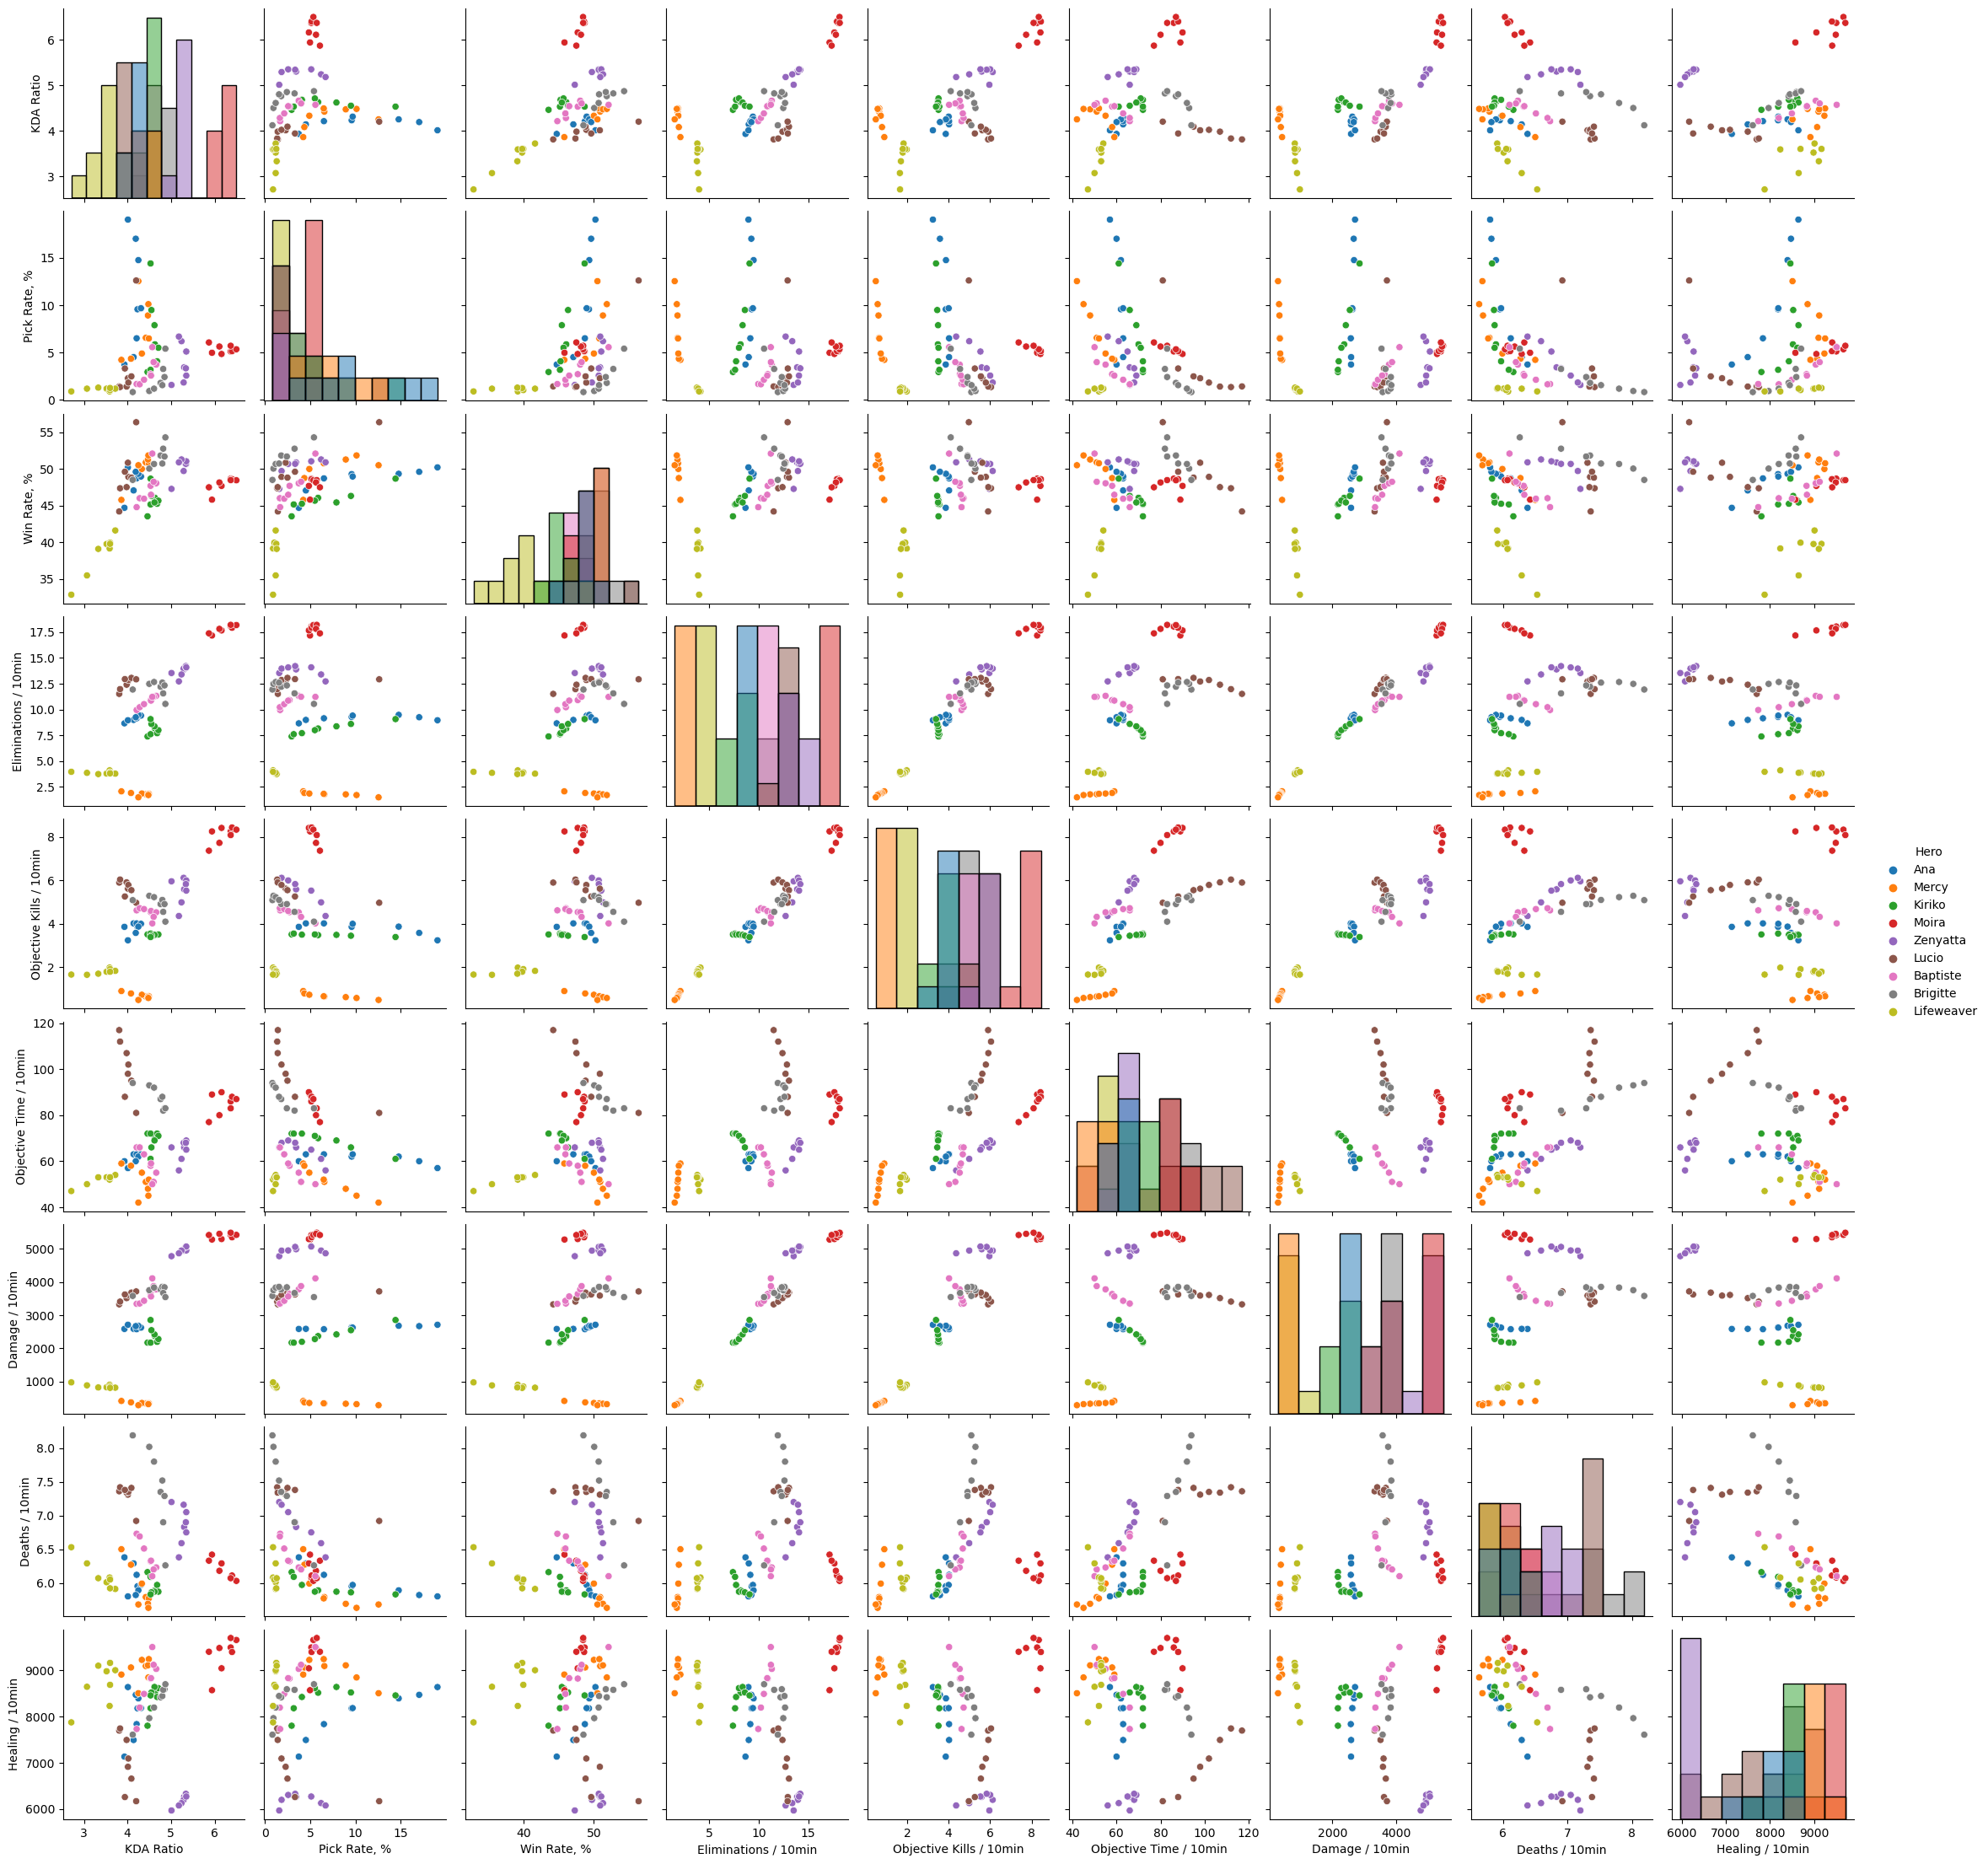

In [8]:
sns.pairplot(s4_heals[selected_columns + ['Healing / 10min','Hero']], hue='Hero', diag_kind='hist')
plt.savefig('../images/support_pairplot_.png')

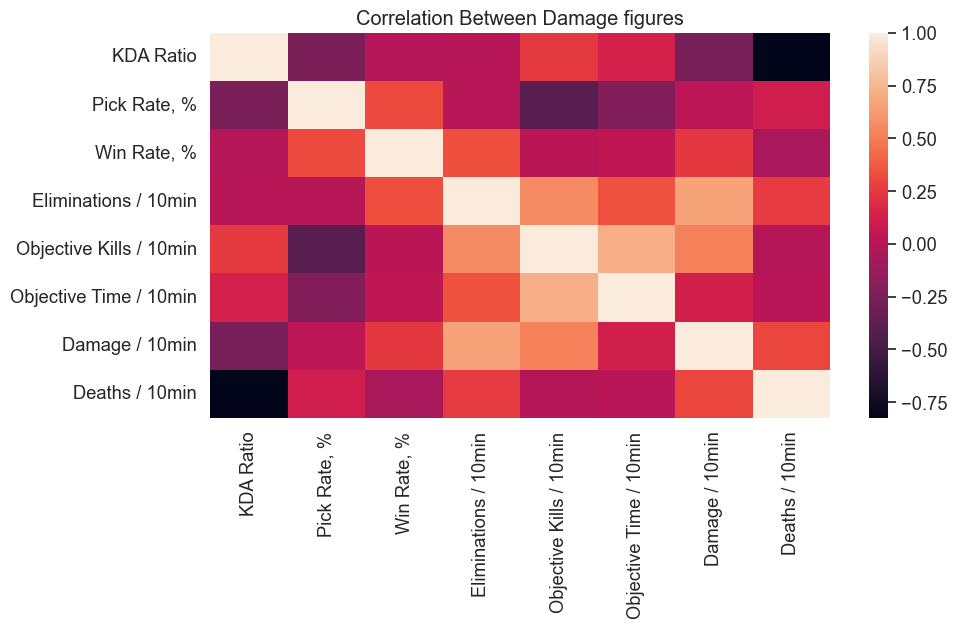

<Figure size 640x480 with 0 Axes>

In [9]:
correl_matrix = s4_dps[selected_columns].corr()
mask = np.triu(correl_matrix)

plt.figure(figsize=(10,5))
sns.set(font_scale=1.2) 
sns.heatmap(correl_matrix)
plt.title('Correlation Between Damage figures')
plt.show()
plt.savefig("../images/heatmap_dps.png")

<Axes: xlabel='Role', ylabel='Win Rate, %'>

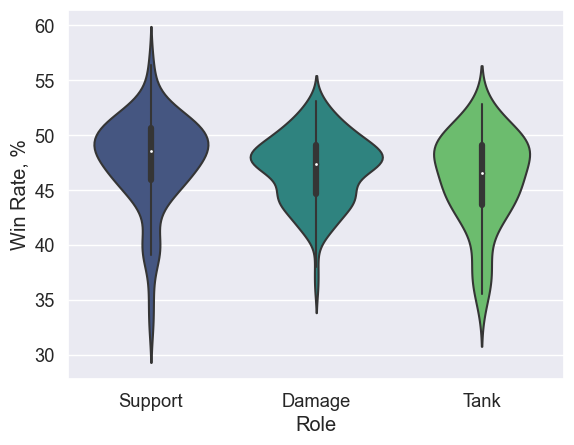

In [10]:
sns.violinplot(data=s4, x='Role', y='Win Rate, %', palette='viridis')

<Axes: xlabel='Role', ylabel='KDA Ratio'>

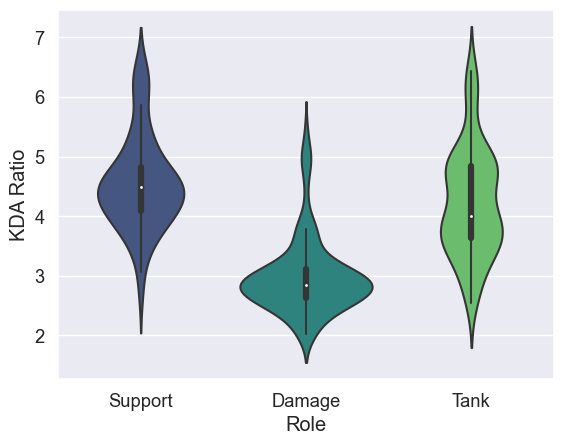

In [11]:
sns.violinplot(data=s4, x='Role', y='KDA Ratio', palette='viridis')

In [12]:
s4_dps.head()

,Hero,Skill Tier,KDA Ratio,"Pick Rate, %","Win Rate, %",Eliminations / 10min,Objective Kills / 10min,Objective Time / 10min,Damage / 10min,Healing / 10min,Deaths / 10min,"Scoped Accuracy, %",Role
16,Genji,All,2.50,3.45,49.28,18.30,5.06,64,7292,NaN,8.09,NaN,Damage
17,Genji,Bronze,2.37,1.15,44.89,16.33,5.34,70,6572,NaN,8.15,NaN,Damage
18,Genji,Silver,2.53,1.40,47.39,16.91,5.26,69,6777,NaN,8.16,NaN,Damage
19,Genji,Gold,2.50,2.21,48.29,17.63,5.31,68,7044,NaN,8.17,NaN,Damage
20,Genji,Platinum,2.51,3.53,49.10,18.32,5.21,66,7291,NaN,8.14,NaN,Damage


In [13]:
s4_dps.to_csv('../data/s4_dps.csv', index=False)
s4_heals.to_csv('../data/s4_heals.csv', index=False)
s4_tank.to_csv('../data/s4_tank.csv', index=False)